# Exp 1 – Linear Regression

##

### 1. Nhập các thư viện cho mô hình

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

# nhóm công cụ chia dữ liệu và đánh giá mô hình
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# đánh giá mô hình
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score

# bỏ qua các thông báo/cảnh báo
import warnings
warnings.filterwarnings('ignore')

### 2. Tải lên file dữ liệu đã qua EDA và Preprocessing

In [2]:
train_path = "../../data/data_afterMVAnalysis/train_features_rmMV.csv"
test_path = "../../data/data_afterMVAnalysis/test_features_rmMV.csv"
target_path = "../../data/data_afterMVAnalysis/target.csv"

train_ = pd.read_csv(train_path)
test_ = pd.read_csv(test_path)
target = pd.read_csv(target_path)

print("Đã tải các tệp dữ liệu đã qua xử lý")

Đã tải các tệp dữ liệu đã qua xử lý


### 3. Logarit hoá biến mục tiêu

In [3]:
y_log = np.log1p(target)
print("Đã log-transform SalePrice")

y_train = y_log.values.ravel()
print(f"Kích thước y_train (log): {y_train.shape}")

Đã log-transform SalePrice
Kích thước y_train (log): (1439,)


##### thay đổi này giúp mô hình học nhanh hơn

### 4. Khởi tạo model với RandomizedSearchCV và Cross Validation (CV)

In [4]:
# Tạo scorer cho RMSE
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), 
                          greater_is_better=False)
print("Đã tạo RMSE scorer")

Đã tạo RMSE scorer


##### 4.1 Tối ưu Ridge Regression

In [5]:
# Ridge Regression với dữ liệu đã log transform
print("Tối ưu Ridge Regression")

param_dist_ridge = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
}

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=25))
])

random_search_ridge = RandomizedSearchCV(
    ridge_pipeline, param_dist_ridge, n_iter=30, cv=5,
    scoring=rmse_scorer, n_jobs=-1, random_state=25, verbose=1
)

# Sửa: Huấn luyện với y_train (đã log transform)
random_search_ridge.fit(train_, y_train)

print("Hoàn thành tối ưu Ridge Regression")
print(f"Các thông số tốt nhất: {random_search_ridge.best_params_}")
print(f"Điểm CV (RMSE) tốt nhất: {-random_search_ridge.best_score_:.4f}")

Tối ưu Ridge Regression
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Hoàn thành tối ưu Ridge Regression
Các thông số tốt nhất: {'ridge__solver': 'lsqr', 'ridge__alpha': 100}
Điểm CV (RMSE) tốt nhất: 0.1183


##### 4.2 Tối ưu Lasso Regression

In [6]:
# Lasso Regression với dữ liệu đã log transform
print("Tối ưu Lasso Regression")

param_dist_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'lasso__selection': ['cyclic', 'random']
}

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=25, max_iter=10000))
])

random_search_lasso = RandomizedSearchCV(
    lasso_pipeline, param_dist_lasso, n_iter=20, cv=5,
    scoring=rmse_scorer, n_jobs=-1, random_state=25, verbose=1
)

# Sửa: Huấn luyện với y_train (đã log transform)
random_search_lasso.fit(train_, y_train)

print("Hoàn thành tối ưu Lasso Regression")
print(f"Các thông số tốt nhất: {random_search_lasso.best_params_}")
print(f"Điểm CV (RMSE) tốt nhất: {-random_search_lasso.best_score_:.4f}")

Tối ưu Lasso Regression
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Hoàn thành tối ưu Lasso Regression
Các thông số tốt nhất: {'lasso__selection': 'cyclic', 'lasso__alpha': 0.001}
Điểm CV (RMSE) tốt nhất: 0.1146


##### 4.3 Tối ưu Polynomial + Ridge Regression

In [7]:
# Polynomial + Ridge Regression với dữ liệu đã log transform
print("Tối ưu Polynomial Features + Ridge Regression")

param_dist_poly = {
    'poly__degree': [1, 2],
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

poly_ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=25))
])

random_search_poly = RandomizedSearchCV(
    poly_ridge_pipeline, param_dist_poly, n_iter=20, cv=5,
    scoring=rmse_scorer, n_jobs=-1, random_state=25, verbose=1
)

# Sửa: Huấn luyện với y_train (đã log transform)
random_search_poly.fit(train_, y_train)

print("Hoàn thành tối ưu Polynomial Ridge")
print(f"Các thông số tốt nhất: {random_search_poly.best_params_}")
print(f"Điểm CV (RMSE) tốt nhất: {-random_search_poly.best_score_:.4f}")

Tối ưu Polynomial Features + Ridge Regression
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Hoàn thành tối ưu Polynomial Ridge
Các thông số tốt nhất: {'ridge__alpha': 100, 'poly__degree': 1}
Điểm CV (RMSE) tốt nhất: 0.1183


### 5. Đánh giá mô hình và huấn luyện lần cuối với các thông số tốt nhất

In [8]:
# So sánh các mô hình và chọn mô hình tốt nhất
models_comparison = {
    'Ridge': (-random_search_ridge.best_score_, random_search_ridge.best_estimator_),
    'Lasso': (-random_search_lasso.best_score_, random_search_lasso.best_estimator_),
    'Poly_Ridge': (-random_search_poly.best_score_, random_search_poly.best_estimator_)
}

best_model_name = min(models_comparison, key=lambda x: models_comparison[x][0])
best_model = models_comparison[best_model_name][1]
best_rmse = models_comparison[best_model_name][0]

print(f"{'Model':<15} {'RMSE':<12} {'Best Parameters'}")
print("-" * 50)
for name, (rmse, model) in models_comparison.items():
    if name == 'Poly_Ridge':
        alpha = model.named_steps['ridge'].alpha
        degree = model.named_steps['poly'].degree
        print(f"{name:<15} {rmse:<12.4f} alpha={alpha}, degree={degree}")
    else:
        alpha = model.named_steps[name.lower()].alpha
        print(f"{name:<15} {rmse:<12.4f} alpha={alpha}")

print(f"Mô hình tốt nhất: {best_model_name} (RMSE: {best_rmse:.4f})")

Model           RMSE         Best Parameters
--------------------------------------------------
Ridge           0.1183       alpha=100
Lasso           0.1146       alpha=0.001
Poly_Ridge      0.1183       alpha=100, degree=1
Mô hình tốt nhất: Lasso (RMSE: 0.1146)


##### Lấy ra mô hình tốt nhất để huấn luyện 

In [9]:
# Ta huấn luyện mô hình tốt nhất với toàn bộ dữ liệu
print(f"Huấn luyện mô hình {best_model_name} với toàn bộ dữ liệu !")

# Sửa: Huấn luyện với y_train (đã log transform)
best_model.fit(train_, y_train)
print(f"Đã huấn luyện xong mô hình {best_model_name}")

Huấn luyện mô hình Lasso với toàn bộ dữ liệu !
Đã huấn luyện xong mô hình Lasso


### 6. Đánh giá về điểm và độ ổn định của các Fold

In [10]:
# Đánh giá mô hình trên tập train
y_pred_train_log = best_model.predict(train_)

# RMSE
y_pred_train_original = np.expm1(y_pred_train_log)
y_train_original = np.expm1(y_train)

# Tính các metrics
rmse_train_log = np.sqrt(mean_squared_error(y_train, y_pred_train_log))
r2_train_log = r2_score(y_train, y_pred_train_log)
r2_train_original = r2_score(y_train_original, y_pred_train_original)

print(f"RMSE (log scale): {rmse_train_log:.4f}")
print(f"R² (log scale): {r2_train_log:.4f}")
print(f"R² trên tập train: {r2_train_original:.4f}")

RMSE (log scale): 0.0923
R² (log scale): 0.9444
R² trên tập train: 0.9522


In [11]:
print("Đánh giá độ ổn định với Cross-Validation")

kf = KFold(n_splits=5, shuffle=True, random_state=25)

cv_scores = cross_val_score(
    best_model, 
    train_, 
    y_train,  # Sửa: dùng y_train (log transform)
    cv=kf, 
    scoring=rmse_scorer,
    n_jobs=-1
)

cv_scores = -cv_scores  # Chuyển về giá trị dương

print("Điểm RMSE của từng Fold: ")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: RMSE = {score:.4f}")

print(f"RMSE trung bình: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Đánh giá độ ổn định
print(f"RMSE nhỏ nhất: {cv_scores.min():.4f}")
print(f"RMSE lớn nhất: {cv_scores.max():.4f}")
print(f"Khoảng biến động: {cv_scores.max() - cv_scores.min():.4f}")

if cv_scores.std() < cv_scores.mean() * 0.1:
    print("Mô hình tương đối ổn định qua các fold")
else:
    print("Mô hình có độ biến động lớn qua các fold")

Đánh giá độ ổn định với Cross-Validation
Điểm RMSE của từng Fold: 
Fold 1: RMSE = 0.1217
Fold 2: RMSE = 0.1155
Fold 3: RMSE = 0.1133
Fold 4: RMSE = 0.1064
Fold 5: RMSE = 0.1244
RMSE trung bình: 0.1163 (+/- 0.0127)
RMSE nhỏ nhất: 0.1064
RMSE lớn nhất: 0.1244
Khoảng biến động: 0.0180
Mô hình tương đối ổn định qua các fold


### 7. Tạo file submit bài và lưu file mô hình

In [12]:
test_pred_log = best_model.predict(test_)

if test_pred_log.ndim > 1:
    test_pred_log = test_pred_log.ravel()

# Chuyển từ log scale về scale gốc
test_pred_final = np.expm1(test_pred_log)

# Tạo submission file
submission = pd.DataFrame({
    'Id': range(1461, 1461 + len(test_pred_final)),  
    'SalePrice': test_pred_final
})

# Lưu file
submission.to_csv('result/LR_submission.csv', index=False)
print("Đã tạo file LR_submission.csv")

Đã tạo file LR_submission.csv


In [13]:
joblib.dump(best_model, 'pkl/Linear_model.pkl')
print("Đã lưu mô hình Linear Regression")

Đã lưu mô hình Linear Regression


### 8. Biểu đồ các đặc trưng quan trọng nhất của mô hình

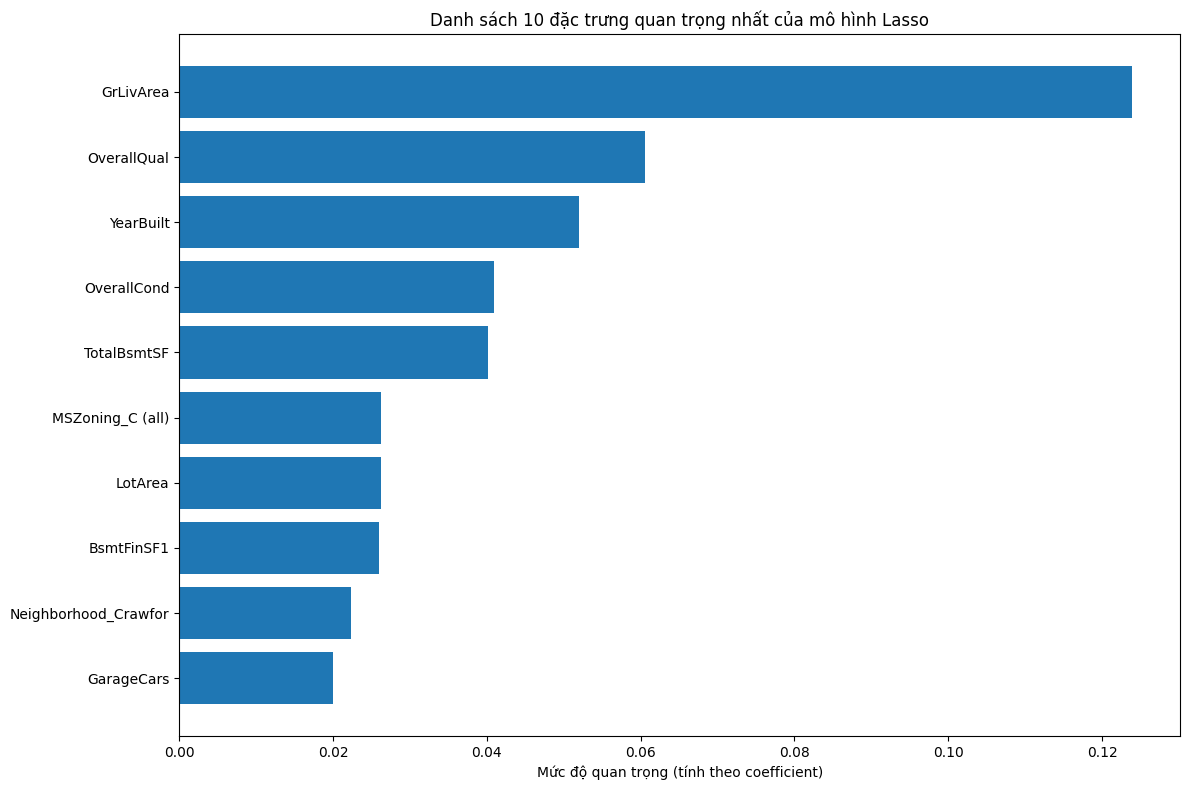

In [14]:
# Lấy coefficients từ mô hình
if hasattr(best_model, 'named_steps'):
    if 'ridge' in best_model.named_steps:
        coefficients = best_model.named_steps['ridge'].coef_
    elif 'lasso' in best_model.named_steps:
        coefficients = best_model.named_steps['lasso'].coef_
    else:
        coefficients = best_model.coef_
else:
    coefficients = best_model.coef_

# Tạo biểu đồ
feature_importance = pd.DataFrame({
    'feature': train_.columns,
    'importance': np.abs(coefficients)
}).sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Mức độ quan trọng (tính theo coefficient)')
plt.title(f'Danh sách 10 đặc trưng quan trọng nhất của mô hình {best_model_name}')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()